# Computation of annotation enrichment in a genetic set 

This code excerpt shows how to use the annotation enrichment computation function in a genetic set.
The funciton return a dataframe of binom and hypergeometric p-value (<= 0.05) and for each p-value a fdr correction with alpha = 0.05.   

In the second part of the code we will compare the results obtained with the Great webserver and between the binomial and hypergeometric probability

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [128]:
import greatpy as great
import pandas as pd
from math import inf
from numpy import log,nan, int64,cov,corrcoef
from scipy.stats import pearsonr
from seaborn import scatterplot as sp

import warnings
warnings.filterwarnings('ignore')

## I Compute the p-values

In [6]:
enrichment_fdr = great.tl.enrichment(
    test="../data/human/test_genomic_region.bed",
    regdom_file="../data/human/regulatory_domain.bed",
    chr_size_file="../data/human/chr_size.bed",
    annotation="../data/human/ontologies.csv",
    binom=True,
    hypergeom=True,
    alpha=0.05,
    correction=("fdr",0.05),
    sort_by="binom_fdr_correction",
    )

In [7]:
enrichment_fdr

,go_term,binom_p_value,hypergeom_p_value,binom_fdr_correction,hypergeom_fdr_correction
GO:0045887,positive regulation of synaptic growth at neur...,5.17744e-13,2.92750e-03,3.07540e-10,9.64682e-02
GO:0016561,"protein import into peroxisome matrix, translo...",6.31131e-10,5.84656e-03,9.37230e-08,9.64682e-02
GO:0044721,"protein import into peroxisome matrix, substra...",4.83812e-10,2.92750e-03,9.37230e-08,9.64682e-02
GO:0036250,peroxisome transport along microtubule,4.83812e-10,2.92750e-03,9.37230e-08,9.64682e-02
GO:0047485,protein N-terminus binding,1.29450e-09,5.03770e-03,1.53786e-07,9.64682e-02
...,...,...,...,...,...
GO:0072197,ureter morphogenesis,1.97164e-02,5.84656e-03,4.43620e-02,9.64682e-02
GO:0061138,morphogenesis of a branching epithelium,2.06973e-02,8.75719e-03,4.63932e-02,1.00034e-01
GO:0045063,T-helper 1 cell differentiation,2.11867e-02,1.45533e-02,4.71344e-02,1.06496e-01
GO:0006888,ER to Golgi vesicle-mediated transport,2.11222e-02,5.36764e-01,4.71344e-02,6.10801e-01


In [8]:
enrichment_bonferroni = great.tl.enrichment(
    test="../data/human/test_genomic_region.bed",
    regdom_file="../data/human/regulatory_domain.bed",
    chr_size_file="../data/human/chr_size.bed",
    annotation="../data/human/ontologies.csv",
    binom=True,
    hypergeom=True,
    alpha=0.05,
    correction=("bonferroni",0.05),
    )

In [9]:
enrichment_bonferroni

,go_term,binom_p_value,hypergeom_p_value,binom_bonferroni_correction,hypergeom_bonferroni_correction
GO:0002162,dystroglycan binding,1.29786e-05,4.02252e-02,7.70928e-03,1
GO:0007213,G protein-coupled acetylcholine receptor signa...,4.28794e-05,4.86352e-02,2.54703e-02,1
GO:0033691,sialic acid binding,1.83861e-06,3.45779e-02,1.09214e-03,1
GO:0035374,chondroitin sulfate binding,1.06551e-06,2.60455e-02,6.32912e-04,1
GO:0043113,receptor clustering,6.53249e-05,7.61475e-02,3.88030e-02,1
...,...,...,...,...,...
GO:0008479,queuine tRNA-ribosyltransferase activity,1.75630e-05,1.16594e-02,1.04324e-02,1
GO:0101030,tRNA-guanine transglycosylation,2.90290e-05,1.16594e-02,1.72432e-02,1
GO:0044323,retinoic acid-responsive element binding,4.63051e-07,1.16594e-02,2.75052e-04,1
GO:0048387,negative regulation of retinoic acid receptor ...,8.90815e-06,2.60455e-02,5.29144e-03,1


In [145]:
enrichment_tot = enrichment_fdr 
enrichment_tot["binom_bonferroni_correction"] = enrichment_bonferroni["binom_bonferroni_correction"]
enrichment_tot["hypergeom_bonferroni_correction"] = enrichment_bonferroni["hypergeom_bonferroni_correction"]
enrichment_tot = enrichment_tot[["binom_p_value","binom_bonferroni_correction","binom_fdr_correction","hypergeom_p_value","hypergeom_bonferroni_correction","hypergeom_fdr_correction"]]
enrichment_tot = enrichment_tot.reset_index().rename(columns={"index":"id","binom_bonferroni_correction":"binom_bonferroni","binom_fdr_correction":"binom_fdr","hypergeom_p_value":"hyper_p_value","hypergeom_bonferroni_correction":"hyper_bonferroni","hypergeom_fdr_correction":"hyper_fdr"})

## II Compare to GREAT webserver  

### II.1 Import the data

In [156]:
great_webserver = pd.read_csv("../data/output_great_webserver.tsv",sep="\t",comment="#",
                    names=["ontologie","term_name","ID","binom_p_value","binom_bonferroni","binom_fdr","hyper_p_value","hyper_bonferroni","hyper_fdr"],index_col=False,
                    dtype={"term_name":"object", "ID":"object","binom_p_value":"float64", "binom_bonferroni":"float64", "binom_fdr":"float64", "hyper_p_value":"float64", "hyper_bonferroni":"float64", "hyper_fdr":"float64"})
great_webserver.rename(columns={"ID":"id"},inplace=True)
del great_webserver["ontologie"]
del great_webserver["term_name"]

### II.2 Compare the results between greatpy and great 

#### II.2.1 Preprocessing

In [157]:
enrichment_tot = enrichment_tot[enrichment_tot["id"].isin(list(great_webserver["id"]))]
enrichment_tot = enrichment_tot.sort_values("id")
enrichment_tot

,id,binom_p_value,binom_bonferroni,binom_fdr,hyper_p_value,hyper_bonferroni,hyper_fdr
122,GO:0000146,2.45815e-04,NaN,1.18711e-03,2.82715e-03,NaN,9.64682e-02
125,GO:0001054,3.06496e-04,NaN,1.42234e-03,3.74057e-02,NaN,1.42429e-01
113,GO:0001055,1.78466e-04,NaN,9.29900e-04,3.17420e-02,NaN,1.36629e-01
150,GO:0001056,8.63394e-04,NaN,3.39640e-03,4.58400e-02,NaN,1.52117e-01
16,GO:0001765,8.79725e-08,5.22557e-05,3.07386e-06,2.31849e-02,1,1.25198e-01
...,...,...,...,...,...,...,...
218,GO:1990774,6.31080e-03,NaN,1.70392e-02,2.92750e-03,NaN,9.64682e-02
237,GO:2000426,8.61060e-03,NaN,2.14903e-02,5.84656e-03,NaN,9.64682e-02
257,GO:2000819,1.56276e-02,NaN,3.59799e-02,8.75719e-03,NaN,1.00034e-01
8,GO:2001046,5.28618e-09,3.13999e-06,3.48888e-07,2.31849e-02,1,1.25198e-01


In [158]:
great_webserver = great_webserver[great_webserver["id"].isin(list(enrichment_tot["id"]))]
great_webserver = great_webserver.sort_values("id")
great_webserver

,id,binom_p_value,binom_bonferroni,binom_fdr,hyper_p_value,hyper_bonferroni,hyper_fdr
187,GO:0000146,1.23963e-03,1.00000e+00,1.37729e-01,2.08176e-03,1.00000e+00,1.00000e+00
189,GO:0001054,1.55246e-03,1.00000e+00,1.59866e-01,3.64538e-02,1.00000e+00,1.00000e+00
182,GO:0001055,1.22099e-04,5.15502e-01,2.24131e-02,3.34666e-02,1.00000e+00,1.00000e+00
188,GO:0001056,1.34219e-03,1.00000e+00,1.41668e-01,4.83124e-02,1.00000e+00,1.00000e+00
17,GO:0001765,1.14945e-06,1.51257e-02,8.40315e-04,3.04702e-02,1.00000e+00,1.00000e+00
...,...,...,...,...,...,...,...
93,GO:1990774,6.67926e-03,1.00000e+00,5.39217e-01,3.08888e-03,1.00000e+00,1.00000e+00
103,GO:2000426,1.03013e-02,1.00000e+00,7.06012e-01,6.16839e-03,1.00000e+00,1.00000e+00
113,GO:2000819,1.91393e-02,1.00000e+00,1.00000e+00,9.23855e-03,1.00000e+00,1.00000e+00
7,GO:2001046,5.24222e-09,6.89824e-05,8.62279e-06,1.83932e-02,1.00000e+00,1.00000e+00


#### II.2.b Graphical

In [149]:
def plot(df1,df2,colname,minus_log10=True):    
    df1 = df1.dropna()
    df2 = df2.dropna()
    df1 = df1.astype({colname:"float64"})
    df2 = df2.astype({colname:"float64"})
    d = pd.DataFrame()

    if minus_log10 :
        d[f"-log({colname}_df1)"] = -log(df1[colname])
        d[f"-log({colname}_df2)"] = -log(df2[colname])
        sp(data=d,x=f"-log({colname}_df1)",y=f"-log({colname}_df2)")
    else : 
        d[f"{colname}_df1"] = df1[colname]
        d[f"{colname}_df2"] = df2[colname]
        sp(data=d,x=f"{colname}_df1",y=f"{colname}_df2")

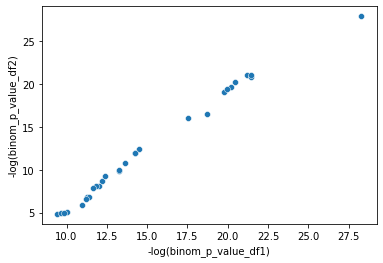

In [150]:
plot(enrichment_tot,great_webserver,"binom_p_value")

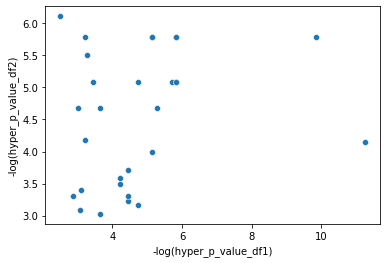

In [153]:
plot(enrichment_tot,great_webserver,"hyper_p_value")

#### II.2.c statistics

In [184]:
def stat() : 
    binom_greatpy = hyper_greatpy = binom_great = hyper_great = []
    for i in range(enrichment_tot.shape[0]) : 
        curr_enrichment = enrichment_tot.iloc[i]
        curr_great_webserver = great_webserver.loc[great_webserver["id"]==curr_enrichment["id"]]
        binom_greatpy.append(float(curr_enrichment["binom_p_value"]))
        hyper_greatpy.append(float(curr_enrichment["hyper_p_value"]))
        binom_great.append(float(curr_great_webserver["binom_p_value"]))
        hyper_great.append(float(curr_great_webserver["hyper_p_value"]))
    return pd.DataFrame({"binom": [cov(m = binom_greatpy, y = binom_great)[0][1],pearsonr(binom_greatpy,binom_great)[0]],"hyper":[cov(m = hyper_greatpy, y = hyper_great)[0][1],pearsonr(hyper_greatpy,hyper_great)[0]]},index=["correlation_coefficient","pearson"])


In [185]:
stat()

,binom,hyper
correlation_coefficient,1.30859e-03,1.30859e-03
pearson,1.00000e+00,1.00000e+00


The result returned by greatpy is similar to the one obtained (pearson coefficient = 1) but the results have been reduced to select only the ids present in great_output and greatpy_output. 

On the other hand, the two variables (binomial probability and hypergeometric probability) do not seem to be correlated because the correlation coefficient is close to 0 

## III Compare both results

### III.1 Without correction

#### III.1.a Without log scale

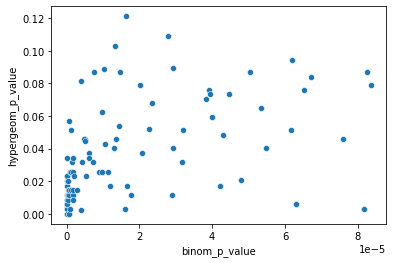

In [186]:
great.pl.scatterplot(
    enrichment_fdr,
    "binom_p_value",
    "hypergeom_p_value",
    minus_log10=False)

#### III.1.b With log scale

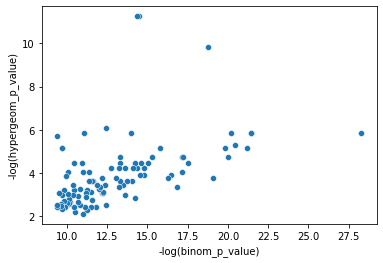

In [187]:
great.pl.scatterplot(
    enrichment_fdr,
    "binom_p_value",
    "hypergeom_p_value",
    minus_log10=True)

Resembling the images of the articule published by the Berjano lab: https://www.nature.com/articles/nbt.1630/figures/2

### III.2 With fdr correction

#### III.2.a without log scale

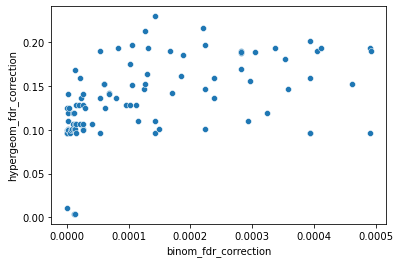

In [188]:
great.pl.scatterplot(
    enrichment_fdr,
    "binom_fdr_correction",
    "hypergeom_fdr_correction",
    minus_log10=False)


#### III.2.b with log scale

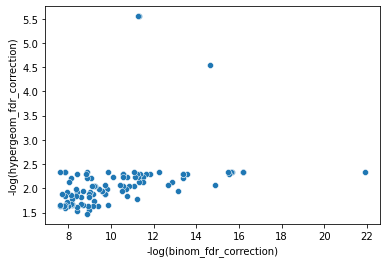

In [189]:
great.pl.scatterplot(
    enrichment_fdr,
    "binom_fdr_correction",
    "hypergeom_fdr_correction",
    minus_log10=True)

### III.3 With bonferroni correction

#### III.3.a without log scale

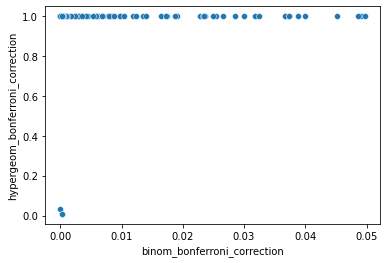

In [190]:
great.pl.scatterplot(
    enrichment_bonferroni,
    "binom_bonferroni_correction",
    "hypergeom_bonferroni_correction",
    minus_log10=False)

#### III.3.b with log scale

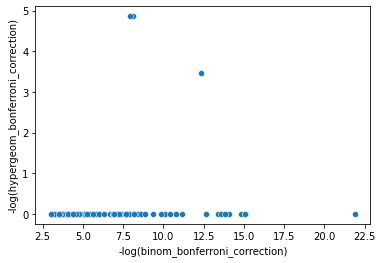

In [191]:
great.pl.scatterplot(
    enrichment_bonferroni,
    "binom_bonferroni_correction",
    "hypergeom_bonferroni_correction",
    minus_log10=True)

We observe that the two probability values returned by greatpy (binomial and hypergeometric) are very different. According to the documentation of Great : 

By default, GREAT ranks results by the binomial p-value, and we consider this the single best way to examine genome-wide cis-regulatory datasets. It accounts for biases in gene regulatory domain size and provides an accurate picture of the cis-regulatory landscape. (https://great-help.atlassian.net/wiki/spaces/GREAT/pages/655456/Statistics) 